EXTRACTING DATA

In [2]:
import time
import pandas as pd
import zipfile

chunk_size = 60000

# Initialize an empty list to store the chunks
processed_data = []

# Path to the zip file and the CSV file inside it
zip_path = r"C:/Users/siidh/Documents/Mswasth/consult_details_all_partner_data/consult_det_report_gen.zip"
csv_filename = "consult_det_report_gen.csv"

# Open the zip file
with zipfile.ZipFile(zip_path, 'r') as z:
    # Open the CSV file inside the zip file
    with z.open(csv_filename) as f:
        # Read the specified rows in chunks from the CSV file
        for chunk in pd.read_csv(f, sep='|', encoding='windows-1252', encoding_errors='ignore', on_bad_lines='skip', chunksize=chunk_size):
            print("added chunk")
            processed_data.append(chunk)

    # Reset the pointer to the beginning of the CSV file for the header read
    with z.open(csv_filename) as f:
        headers = pd.read_csv(f, nrows=1, sep='|')

# Concatenate the chunks into a single DataFrame
processed_df_1 = pd.concat(processed_data)
processed_df_1.columns = headers.columns
print('Processing data...')


added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk


C:\Users\siidh\AppData\Local\Temp\ipykernel_8956\2092164984.py:19: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(f, sep='|', encoding='windows-1252', encoding_errors='ignore', on_bad_lines='skip', chunksize=chunk_size):


added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk


C:\Users\siidh\AppData\Local\Temp\ipykernel_8956\2092164984.py:19: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(f, sep='|', encoding='windows-1252', encoding_errors='ignore', on_bad_lines='skip', chunksize=chunk_size):


added chunk
added chunk
added chunk
added chunk
added chunk
added chunk


C:\Users\siidh\AppData\Local\Temp\ipykernel_8956\2092164984.py:19: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(f, sep='|', encoding='windows-1252', encoding_errors='ignore', on_bad_lines='skip', chunksize=chunk_size):


added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
added chunk
Processing data...


In [3]:

processed_df_1.head()

,Date,Product,Channel,EMR#,Consultation #,Mobile #,Member #,Type,Status,Patient Gender,...,Doctor,Chief Complaint,Diagnosis,Advice,REFERRED,Lab Tests,Medicine,Clinic Name,Prescrption json,ICD Code
0,2020-05-15,M-Swasth Doctor - FREE,CashPor,1,1,7571029662,21:01:84:01:25,CALL,DONE,M,...,SATISH,Other,.,referred to higher centre,NO,NaN,NO,NaN,"{""pres"":[]}",.
1,2021-06-10,M-Swasth Doctor - FREE,CashPor,1,47576,7571029662,21:01:84:01:25,CALL,DONE,M,...,KADAMBARI,Other,Dysmenorrhea and menorrhagia,Advised not miss a single tablet of Ovral l\nD...,NO,NaN,YES,NaN,"{""pres"":[{""mName"":""Tab Ovral L"",""m"":"""",""a"":"""",...",NONE
2,2021-06-11,M-Swasth Doctor - FREE,CashPor,1,48043,7571029662,21:01:84:01:25,CALL,DONE,M,...,NIKHIL,Other,C/o Weakness with loss of appetite,"Eat healthy food , green vegetables and fruits...",NO,NaN,YES,NaN,"{""pres"":[{""mName"":""Multiprex Cap"",""m"":""1"",""a"":...",NONE
3,2021-06-11,M-Swasth Doctor - FREE,CashPor,1,48603,7571029662,21:01:84:01:25,CALL,DONE,M,...,ravindra,Other,pain,Take nutritious diet\nDo Excercise regularly\n...,NO,CBC,YES,NaN,"{""pres"":[{""mName"":""Paracetamol 500mg Tab"",""m"":...",R50
4,2021-06-16,M-Swasth Doctor - FREE,CashPor,1,52282,7571029662,21:01:84:01:25,CALL,DONE,M,...,Harinder Pal,Other Pain,Gall Stones,Referred to nearby hospital for surgical consu...,YES,Ultrasound,NO,NaN,"{""pres"":[]}",K87


CLEANING DATA

In [4]:
column_to_clean = 'Diagnosis'

processed_df_1[column_to_clean] = processed_df_1[column_to_clean].str.replace('?', '')
processed_df_1[column_to_clean] = processed_df_1[column_to_clean].str.replace('C/O', '')
processed_df_1[column_to_clean] = processed_df_1[column_to_clean].str.replace('C/o', '')
processed_df_1[column_to_clean] = processed_df_1[column_to_clean].str.replace('c/o', '')
processed_df_1[column_to_clean] = processed_df_1[column_to_clean].str.replace('H/O', '')
processed_df_1[column_to_clean] = processed_df_1[column_to_clean].str.replace('H/O', '')
processed_df_1[column_to_clean] = processed_df_1[column_to_clean].str.replace('K/C/O HTN', '')
processed_df_1['Diagnosis'] = processed_df_1['Diagnosis'].replace(r'\\n', ',', regex=True).replace(r'\n', ',', regex=True)
processed_df_1[column_to_clean] = processed_df_1[column_to_clean].str.replace('u/E', '')
processed_df_1[column_to_clean] = processed_df_1[column_to_clean].str.replace('U/E', '')

In [5]:
processed_df_1.head()

,Date,Product,Channel,EMR#,Consultation #,Mobile #,Member #,Type,Status,Patient Gender,...,Doctor,Chief Complaint,Diagnosis,Advice,REFERRED,Lab Tests,Medicine,Clinic Name,Prescrption json,ICD Code
0,2020-05-15,M-Swasth Doctor - FREE,CashPor,1,1,7571029662,21:01:84:01:25,CALL,DONE,M,...,SATISH,Other,.,referred to higher centre,NO,NaN,NO,NaN,"{""pres"":[]}",.
1,2021-06-10,M-Swasth Doctor - FREE,CashPor,1,47576,7571029662,21:01:84:01:25,CALL,DONE,M,...,KADAMBARI,Other,Dysmenorrhea and menorrhagia,Advised not miss a single tablet of Ovral l\nD...,NO,NaN,YES,NaN,"{""pres"":[{""mName"":""Tab Ovral L"",""m"":"""",""a"":"""",...",NONE
2,2021-06-11,M-Swasth Doctor - FREE,CashPor,1,48043,7571029662,21:01:84:01:25,CALL,DONE,M,...,NIKHIL,Other,Weakness with loss of appetite,"Eat healthy food , green vegetables and fruits...",NO,NaN,YES,NaN,"{""pres"":[{""mName"":""Multiprex Cap"",""m"":""1"",""a"":...",NONE
3,2021-06-11,M-Swasth Doctor - FREE,CashPor,1,48603,7571029662,21:01:84:01:25,CALL,DONE,M,...,ravindra,Other,pain,Take nutritious diet\nDo Excercise regularly\n...,NO,CBC,YES,NaN,"{""pres"":[{""mName"":""Paracetamol 500mg Tab"",""m"":...",R50
4,2021-06-16,M-Swasth Doctor - FREE,CashPor,1,52282,7571029662,21:01:84:01:25,CALL,DONE,M,...,Harinder Pal,Other Pain,Gall Stones,Referred to nearby hospital for surgical consu...,YES,Ultrasound,NO,NaN,"{""pres"":[]}",K87


In [6]:
processed_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990682 entries, 0 to 4990681
Data columns (total 21 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   Date              object
 1   Product           object
 2   Channel           object
 3   EMR#              object
 4   Consultation #    object
 5   Mobile #          object
 6   Member #          object
 7   Type              object
 8   Status            object
 9   Patient Gender    object
 10  FEMALE DOC ONLY   object
 11  Doctor            object
 12  Chief Complaint   object
 13  Diagnosis         object
 14  Advice            object
 15  REFERRED          object
 16  Lab Tests         object
 17  Medicine          object
 18  Clinic Name       object
 19  Prescrption json  object
 20  ICD Code          object
dtypes: object(21)
memory usage: 799.6+ MB


GATHERING DATA WITH CHANNEL NAME MUTHOOT

In [7]:
 # Making a copy to avoid modifying the original DataFrame
data=processed_df_1[["Date","Clinic Name","Channel","Prescrption json"]]

muthoot_data = data[data['Channel'].str.contains('Muthoot', case=False, na=False)]

# Assuming 'processed_df_1' is your DataFrame
data = muthoot_data.copy()


In [8]:
data.shape

(860532, 4)

In [9]:
import pandas as pd

# Sort the DataFrame by the 'Date' column in ascending order
data_sorted = data.sort_values(by='Date')

# Display the sorted DataFrame
data_sorted

,Date,Clinic Name,Channel,Prescrption json
29822,2021-04-22,NaN,Muthoot,"{""pres"":[{""mName"":""ampilox cap"",""m"":""1 cap"",""a..."
29989,2021-04-22,NaN,Muthoot,"{""pres"":[{""mName"":""Paracetamol 500mg Tab"",""m"":..."
29990,2021-04-22,NaN,Muthoot,"{""pres"":[{""mName"":""NEUROBION OD CAP"",""m"":"""",""a..."
30014,2021-04-22,NaN,Muthoot,NaN
30076,2021-04-22,NaN,Muthoot,NaN
...,...,...,...,...
4984412,2024-05-22,ECMT595 NANAUTA MML,Muthoot,"{""pres"":[{""dur"":""3"",""a"":"""",""bf"":false,""e"":"""",""..."
4984411,2024-05-22,ECMT608 NAGINA MML,Muthoot,"{""pres"":[{""dur"":""3"",""a"":"""",""bf"":false,""e"":"""",""..."
4984400,2024-05-22,ECMT211 KALLAKURICHI MML KALLAKURICHI,Muthoot,"{""pres"":[{""dur"":""15"",""a"":"""",""bf"":true,""e"":"""",""..."
4984458,2024-05-22,ECMT255 PALI MML,Muthoot,"{""pres"":[{""dur"":""3"",""a"":"""",""bf"":false,""e"":"""",""..."


In [10]:
# Count occurrences of medicines
medicine_counts = data['Clinic Name'].value_counts()

# Display the result
print("Clinic Counts:")
print(medicine_counts)


Clinic Counts:
Clinic Name
ECMT044 PILAKHUA TEHSIL MML HAPUR    5919
ECMT027 Jaunpur MML                  5708
ECMT189 NENMARA MML PALAKKAD         5619
ECMT080 MORADABAD MML MORADABAD      5423
ECMT045 Kalyanpur Samastipur         5128
                                     ... 
EC22:23 Pachpakadi East Champaran       1
ECSV0156 Khatauli Meerut                1
ECSV0150 Dhampur Meerut                 1
ECAC009 Chauparan                       1
ECN032 Sanjeli                          1
Name: count, Length: 923, dtype: int64


LOADING THE JSON DATA AND ORGANISING THEM TO TABLE

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 860532 entries, 29822 to 4990656
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              860532 non-null  object
 1   Clinic Name       740533 non-null  object
 2   Channel           860532 non-null  object
 3   Prescrption json  807806 non-null  object
dtypes: object(4)
memory usage: 32.8+ MB


In [12]:
#df['col_3'] = df.apply(lambda x: f(x.col_1, x.col_2), axis=1)

In [13]:
data["Date"]=data["Date"].astype("str")

In [14]:
data[data.Date=="2021-05-14"]

,Date,Clinic Name,Channel,Prescrption json
35398,2021-05-14,EC000 Group Call,Muthoot,"{""pres"":[{""mName"":""ADITUS COUGH SYRUP"",""m"":""2...."
38772,2021-05-14,EC000 Group Call,Muthoot,"{""pres"":[{""mName"":""Levofloxacin 500 mg Tab"",""m..."
40787,2021-05-14,NaN,Muthoot,"{""pres"":[{""mName"":""Tramadol 50 mg Tab"",""m"":""1""..."
40789,2021-05-14,NaN,Muthoot,NaN
40790,2021-05-14,NaN,Muthoot,"{""pres"":[{""mName"":""Cefixime 200mg film coated ..."
40797,2021-05-14,NaN,Muthoot,"{""pres"":[{""mName"":""PARAMET"",""m"":""1"",""a"":"""",""e""..."
40809,2021-05-14,NaN,Muthoot,"{""pres"":[{""mName"":""Cetrizine (5 mg/ 5 ml) Syru..."
40817,2021-05-14,NaN,Muthoot,"{""pres"":[{""mName"":""Amoxycillin 125mg/ 5ml Dry ..."
40822,2021-05-14,NaN,Muthoot,NaN
40843,2021-05-14,NaN,Muthoot,"{""pres"":[{""mName"":""Doxycycline 100 mg Caps"",""m..."


In [15]:
filtered_data = data[data["Date"] == "2021-05-14"]
result = filtered_data[["Prescrption json"]]
result.values

array([['{"pres":[{"mName":"ADITUS COUGH SYRUP","m":"2.5ml","a":"","e":"","n":"2.5ml","bf":false,"af":true,"dur":"10","freq":"d"},{"mName":"Cetrizine 10mg film coated Tablets","m":"1/2","a":"","e":"","n":"1/2","bf":false,"af":true,"dur":"10","freq":"d"}]}'],
       ['{"pres":[{"mName":"Levofloxacin 500 mg Tab","m":"1","a":"","e":"","n":"","bf":true,"af":false,"dur":"5","freq":"d"},{"mName":"Cefixime 200mg film coated Tablets","m":"1","a":"","e":"","n":"1","bf":false,"af":true,"dur":"5","freq":"d"},{"mName":"Paracetamol 500mg Tab","m":"1","a":"","e":"","n":"1","bf":false,"af":true,"dur":"5","freq":"d"},{"mName":"ACEBROPHYLLINE Capsules 100 mg","m":"1","a":"","e":"","n":"1","bf":false,"af":true,"dur":"5","freq":"d"},{"mName":"ACETYLCYSTEINE Tablets 600 mg","m":"1","a":"","e":"","n":"1","bf":false,"af":true,"dur":"5","freq":"d"},{"mName":"Pantoprazole 40 mg film coated Tablets","m":"1","a":"","e":"","n":"","bf":true,"af":false,"dur":"5","freq":"d"},{"mName":"Cap.cobadex","m":"","a":"","e"

In [54]:
#prescription details of muthoot channel
import pandas as pd
import json

# Sample DataFrame with 'Prescription Json' column
# Replace this with your actual DataFrame

# Define a function to extract medication details
def extract_medication_details(prescription,clinic,date):
    med_details = []
    if isinstance(prescription, str):
        try:
            prescriptions = json.loads(prescription)['pres']
            for prescription in prescriptions:
                med_name = prescription.get('mName', '')
                duration = prescription.get('dur', '')
                morning = 1 if prescription.get('m') else 0
                afternoon = 1 if prescription.get('a') else 0
                evening = 1 if prescription.get('e') else 0
                night = 1 if prescription.get('n') else 0
                frequency = prescription.get('freq', '')
                med_details.append((med_name, duration, morning, afternoon, evening, night, frequency,clinic,date))
        except (json.JSONDecodeError, KeyError):
            pass  # Skip non-JSON entries or entries with missing keys
    return med_details

# Apply the function to each row and expand the result into separate columns
medication_details = data.apply(lambda x: extract_medication_details(x["Prescrption json"], x["Clinic Name"],x.Date), axis=1)
medication_df = pd.DataFrame(medication_details.explode().tolist(), columns=['Medicine Name', 'Duration', 'Morning', 'Afternoon', 'Evening', 'Night', 'Frequency',"Clinic Name","Date"])
medication_df



,Medicine Name,Duration,Morning,Afternoon,Evening,Night,Frequency,Clinic Name,Date
0,ampilox cap,5,1.0,0.0,0.0,0.0,d,NaN,2021-04-22
1,benedryil syrup,5,1.0,1.0,0.0,1.0,d,NaN,2021-04-22
2,limcee,10,1.0,0.0,0.0,0.0,d,NaN,2021-04-22
3,IVERMECTIN TABLETS 12 MG,3,0.0,0.0,0.0,1.0,d,NaN,2021-04-22
4,NaN,None,NaN,NaN,NaN,NaN,None,None,None
...,...,...,...,...,...,...,...,...,...
2492989,Omeprazole 20mg Capsules,3,1.0,0.0,0.0,1.0,d,ECMT369 MAU MML CHITRAKOOT,2024-05-22
2492990,Diclofenac gel,3,1.0,1.0,0.0,1.0,d,ECMT369 MAU MML CHITRAKOOT,2024-05-22
2492991,Tab Aceclo 100mg+ PCM 325mg (SOS),3,1.0,0.0,0.0,1.0,d,ECMT369 MAU MML CHITRAKOOT,2024-05-22
2492992,Omeprazole 20mg Capsules,5,1.0,0.0,0.0,1.0,d,ECMT369 MAU MML CHITRAKOOT,2024-05-22


In [55]:
medication_df.dropna(inplace=True)
medication_df.shape

(2153465, 9)

In [56]:
medication_df

,Medicine Name,Duration,Morning,Afternoon,Evening,Night,Frequency,Clinic Name,Date
39,BECOSULES,10,1.0,0.0,0.0,0.0,d,ECMT001 BULANDSHAHR MML Bulandshahr,2022-04-07
40,CALCIUM 250 MG+VIT D3,10,1.0,0.0,0.0,0.0,d,ECMT001 BULANDSHAHR MML Bulandshahr,2022-04-07
41,CIPLOX EYE DROPS,5,1.0,1.0,1.0,0.0,d,ECMT001 BULANDSHAHR MML Bulandshahr,2022-04-07
42,Amoxycillin 500 mg Caps,3,1.0,1.0,0.0,1.0,d,ECMT044 PILAKHUA TEHSIL MML HAPUR,2022-07-18
43,Paracetamol 500mg Tab,3,1.0,0.0,0.0,1.0,d,ECMT044 PILAKHUA TEHSIL MML HAPUR,2022-07-18
...,...,...,...,...,...,...,...,...,...
2492989,Omeprazole 20mg Capsules,3,1.0,0.0,0.0,1.0,d,ECMT369 MAU MML CHITRAKOOT,2024-05-22
2492990,Diclofenac gel,3,1.0,1.0,0.0,1.0,d,ECMT369 MAU MML CHITRAKOOT,2024-05-22
2492991,Tab Aceclo 100mg+ PCM 325mg (SOS),3,1.0,0.0,0.0,1.0,d,ECMT369 MAU MML CHITRAKOOT,2024-05-22
2492992,Omeprazole 20mg Capsules,5,1.0,0.0,0.0,1.0,d,ECMT369 MAU MML CHITRAKOOT,2024-05-22


In [57]:
import pandas as pd
import calendar as cal

def parse_date(date_str):
    date_str = date_str.replace(' ', '-')
    date_str = date_str.replace('/', '-')
    date_str = date_str.replace('.', '-')

    formats = [
        '%Y-%m-%d', '%d-%m-%Y', '%m-%d-%Y', '%Y-%b-%d', '%d-%b-%Y', '%b-%d-%Y',
        '%Y-%B-%d', '%d-%B-%Y', '%B-%d-%Y'
    ]

    for fmt in formats:
        try:
            d = pd.to_datetime(date_str, format=fmt)
            # If date is valid but falls on an invalid leap year date, continue to next format
            if d.month == 2 and d.day == 29 and not cal.isleap(d.year):
                continue
            return d.strftime('%Y:%m:%d')
        except ValueError:
            pass
    return pd.NaT





In [58]:
medication_df['Date'] = medication_df['Date'].apply(parse_date)


medication_df

,Medicine Name,Duration,Morning,Afternoon,Evening,Night,Frequency,Clinic Name,Date
39,BECOSULES,10,1.0,0.0,0.0,0.0,d,ECMT001 BULANDSHAHR MML Bulandshahr,2022:04:07
40,CALCIUM 250 MG+VIT D3,10,1.0,0.0,0.0,0.0,d,ECMT001 BULANDSHAHR MML Bulandshahr,2022:04:07
41,CIPLOX EYE DROPS,5,1.0,1.0,1.0,0.0,d,ECMT001 BULANDSHAHR MML Bulandshahr,2022:04:07
42,Amoxycillin 500 mg Caps,3,1.0,1.0,0.0,1.0,d,ECMT044 PILAKHUA TEHSIL MML HAPUR,2022:07:18
43,Paracetamol 500mg Tab,3,1.0,0.0,0.0,1.0,d,ECMT044 PILAKHUA TEHSIL MML HAPUR,2022:07:18
...,...,...,...,...,...,...,...,...,...
2492989,Omeprazole 20mg Capsules,3,1.0,0.0,0.0,1.0,d,ECMT369 MAU MML CHITRAKOOT,2024:05:22
2492990,Diclofenac gel,3,1.0,1.0,0.0,1.0,d,ECMT369 MAU MML CHITRAKOOT,2024:05:22
2492991,Tab Aceclo 100mg+ PCM 325mg (SOS),3,1.0,0.0,0.0,1.0,d,ECMT369 MAU MML CHITRAKOOT,2024:05:22
2492992,Omeprazole 20mg Capsules,5,1.0,0.0,0.0,1.0,d,ECMT369 MAU MML CHITRAKOOT,2024:05:22


In [60]:

# Assuming 'data' and 'medication_df' are your DataFrames
medication_df['Date'] = pd.to_datetime(medication_df['Date'], format='%Y:%m:%d')



combined_df = medication_df[(medication_df['Date'].dt.year == 2023) | (medication_df['Date'].dt.year == 2024)|(medication_df['Date'].dt.year == 2022)]


# Display the combined DataFrame
combined_df

,Medicine Name,Duration,Morning,Afternoon,Evening,Night,Frequency,Clinic Name,Date
39,BECOSULES,10,1.0,0.0,0.0,0.0,d,ECMT001 BULANDSHAHR MML Bulandshahr,2022-04-07
40,CALCIUM 250 MG+VIT D3,10,1.0,0.0,0.0,0.0,d,ECMT001 BULANDSHAHR MML Bulandshahr,2022-04-07
41,CIPLOX EYE DROPS,5,1.0,1.0,1.0,0.0,d,ECMT001 BULANDSHAHR MML Bulandshahr,2022-04-07
42,Amoxycillin 500 mg Caps,3,1.0,1.0,0.0,1.0,d,ECMT044 PILAKHUA TEHSIL MML HAPUR,2022-07-18
43,Paracetamol 500mg Tab,3,1.0,0.0,0.0,1.0,d,ECMT044 PILAKHUA TEHSIL MML HAPUR,2022-07-18
...,...,...,...,...,...,...,...,...,...
2492989,Omeprazole 20mg Capsules,3,1.0,0.0,0.0,1.0,d,ECMT369 MAU MML CHITRAKOOT,2024-05-22
2492990,Diclofenac gel,3,1.0,1.0,0.0,1.0,d,ECMT369 MAU MML CHITRAKOOT,2024-05-22
2492991,Tab Aceclo 100mg+ PCM 325mg (SOS),3,1.0,0.0,0.0,1.0,d,ECMT369 MAU MML CHITRAKOOT,2024-05-22
2492992,Omeprazole 20mg Capsules,5,1.0,0.0,0.0,1.0,d,ECMT369 MAU MML CHITRAKOOT,2024-05-22


In [61]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Display the structure of the dataset
print("Dataset structure:")
print(combined_df.info())

# Summary statistics
print("\nSummary statistics:")
print(combined_df.describe())

# Missing values
print("\nMissing values:")
print(combined_df.isnull().sum())



Dataset structure:
<class 'pandas.core.frame.DataFrame'>
Index: 2153447 entries, 39 to 2492993
Data columns (total 9 columns):
 #   Column         Dtype         
---  ------         -----         
 0   Medicine Name  object        
 1   Duration       object        
 2   Morning        float64       
 3   Afternoon      float64       
 4   Evening        float64       
 5   Night          float64       
 6   Frequency      object        
 7   Clinic Name    object        
 8   Date           datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 164.3+ MB
None

Summary statistics:
            Morning     Afternoon       Evening         Night  \
count  2.153447e+06  2.153447e+06  2.153447e+06  2.153447e+06   
mean   6.242016e-01  4.213904e-01  2.472687e-02  5.701088e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    1.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00   

In [62]:
combined_df

,Medicine Name,Duration,Morning,Afternoon,Evening,Night,Frequency,Clinic Name,Date
39,BECOSULES,10,1.0,0.0,0.0,0.0,d,ECMT001 BULANDSHAHR MML Bulandshahr,2022-04-07
40,CALCIUM 250 MG+VIT D3,10,1.0,0.0,0.0,0.0,d,ECMT001 BULANDSHAHR MML Bulandshahr,2022-04-07
41,CIPLOX EYE DROPS,5,1.0,1.0,1.0,0.0,d,ECMT001 BULANDSHAHR MML Bulandshahr,2022-04-07
42,Amoxycillin 500 mg Caps,3,1.0,1.0,0.0,1.0,d,ECMT044 PILAKHUA TEHSIL MML HAPUR,2022-07-18
43,Paracetamol 500mg Tab,3,1.0,0.0,0.0,1.0,d,ECMT044 PILAKHUA TEHSIL MML HAPUR,2022-07-18
...,...,...,...,...,...,...,...,...,...
2492989,Omeprazole 20mg Capsules,3,1.0,0.0,0.0,1.0,d,ECMT369 MAU MML CHITRAKOOT,2024-05-22
2492990,Diclofenac gel,3,1.0,1.0,0.0,1.0,d,ECMT369 MAU MML CHITRAKOOT,2024-05-22
2492991,Tab Aceclo 100mg+ PCM 325mg (SOS),3,1.0,0.0,0.0,1.0,d,ECMT369 MAU MML CHITRAKOOT,2024-05-22
2492992,Omeprazole 20mg Capsules,5,1.0,0.0,0.0,1.0,d,ECMT369 MAU MML CHITRAKOOT,2024-05-22


In [63]:
print("\nMissing values:")
print(combined_df.isnull().sum())


Missing values:
Medicine Name    0
Duration         0
Morning          0
Afternoon        0
Evening          0
Night            0
Frequency        0
Clinic Name      0
Date             0
dtype: int64


In [64]:
# Step 1: Calculate the cumulative percentage of occurrences for each medicine
medicine_counts = combined_df[["Medicine Name"]].value_counts()
total_rows = combined_df.shape[0]
medicine_cumulative_percentage = medicine_counts.cumsum() / total_rows

# Step 2: Iterate through cumulative percentages until reaching or exceeding 72%
medicine_list = []
cumulative_percentage_threshold = 0.75
for medicine, cumulative_percentage in medicine_cumulative_percentage.items():
    if cumulative_percentage <= cumulative_percentage_threshold:
        medicine_list.append(medicine)
    else:
        break

# Step 3: Print out the medicines
print("Medicines adding up to 75% of rows:")
for medicine in medicine_list:
    print(medicine)


Medicines adding up to 75% of rows:
('Calcium + Vit D3 250iu Tabs',)
('Omeprazole 20mg Capsules',)
('Tab Aceclo 100mg+ PCM 325mg (SOS)',)
('Cap Becosule',)
('Paracetamol 500mg Tab',)
('Iron Tablet',)
('Diclofenac Gel',)
('Amoxycillin 250 mg Caps',)
('Cough Syrup',)
('Ranitidine HCl. 150 mg  Tabs',)
('Cetrizine 10mg  Tabs',)
('Cetrizine 10mg film coated Tablets',)
('Metronidazole 400 mg Tab',)
('tab Fluconazole 150mg',)


In [65]:
# Step 1: Calculate the cumulative percentage of occurrences for each medicine
medicine_counts = combined_df["Medicine Name"].value_counts()
total_rows = combined_df.shape[0]
medicine_cumulative_percentage = medicine_counts.cumsum() / total_rows

# Step 2: Determine the threshold for the top 75%
cumulative_percentage_threshold = 0.75
top_medicines = medicine_cumulative_percentage[medicine_cumulative_percentage <= cumulative_percentage_threshold]

# Step 3: Filter the DataFrame based on the top medicines
combined_df = combined_df[combined_df["Medicine Name"].isin(top_medicines.index)]



In [66]:
combined_df

,Medicine Name,Duration,Morning,Afternoon,Evening,Night,Frequency,Clinic Name,Date
43,Paracetamol 500mg Tab,3,1.0,0.0,0.0,1.0,d,ECMT044 PILAKHUA TEHSIL MML HAPUR,2022-07-18
44,Cap Becosule,3,0.0,1.0,0.0,0.0,d,ECMT044 PILAKHUA TEHSIL MML HAPUR,2022-07-18
45,Paracetamol 500mg Tab,3,1.0,0.0,1.0,0.0,d,ECMT044 PILAKHUA TEHSIL MML HAPUR,2022-10-31
46,Cough Syrup,3,1.0,1.0,0.0,1.0,d,ECMT044 PILAKHUA TEHSIL MML HAPUR,2022-10-31
48,Cetrizine 10mg Tabs,3,0.0,0.0,1.0,0.0,d,ECMT044 PILAKHUA TEHSIL MML HAPUR,2022-10-31
...,...,...,...,...,...,...,...,...,...
2492987,Iron Tablet,10,0.0,1.0,0.0,0.0,d,ECMT369 MAU MML CHITRAKOOT,2024-05-22
2492989,Omeprazole 20mg Capsules,3,1.0,0.0,0.0,1.0,d,ECMT369 MAU MML CHITRAKOOT,2024-05-22
2492991,Tab Aceclo 100mg+ PCM 325mg (SOS),3,1.0,0.0,0.0,1.0,d,ECMT369 MAU MML CHITRAKOOT,2024-05-22
2492992,Omeprazole 20mg Capsules,5,1.0,0.0,0.0,1.0,d,ECMT369 MAU MML CHITRAKOOT,2024-05-22


In [67]:
# Columns to convert to numeric data type
#
numeric_cols = ['Duration', 'Morning', 'Afternoon', 'Evening', 'Night']

# Convert columns to numeric data type
for col in numeric_cols:
    combined_df[col] = pd.to_numeric(combined_df[col], errors='coerce')

# Display the DataFrame with converted columns
combined_df.info()


C:\Users\siidh\AppData\Local\Temp\ipykernel_8956\3811613948.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df[col] = pd.to_numeric(combined_df[col], errors='coerce')


<class 'pandas.core.frame.DataFrame'>
Index: 1599391 entries, 43 to 2492993
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Medicine Name  1599391 non-null  object        
 1   Duration       1599391 non-null  float64       
 2   Morning        1599391 non-null  float64       
 3   Afternoon      1599391 non-null  float64       
 4   Evening        1599391 non-null  float64       
 5   Night          1599391 non-null  float64       
 6   Frequency      1599391 non-null  object        
 7   Clinic Name    1599391 non-null  object        
 8   Date           1599391 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 122.0+ MB


In [68]:
value_counts=combined_df["Frequency"].value_counts()
value_counts

Frequency
d    1590800
w       8574
m         13
y          4
Name: count, dtype: int64

In [69]:
combined_df = combined_df[combined_df['Frequency'] == 'd']


In [70]:
clinic_counts=combined_df["Clinic Name"].value_counts()
top_5_clinic_names = clinic_counts.head(5).index
combined_df=combined_df[combined_df["Clinic Name"].isin(top_5_clinic_names)]


In [71]:
combined_df

,Medicine Name,Duration,Morning,Afternoon,Evening,Night,Frequency,Clinic Name,Date
43,Paracetamol 500mg Tab,3.0,1.0,0.0,0.0,1.0,d,ECMT044 PILAKHUA TEHSIL MML HAPUR,2022-07-18
44,Cap Becosule,3.0,0.0,1.0,0.0,0.0,d,ECMT044 PILAKHUA TEHSIL MML HAPUR,2022-07-18
45,Paracetamol 500mg Tab,3.0,1.0,0.0,1.0,0.0,d,ECMT044 PILAKHUA TEHSIL MML HAPUR,2022-10-31
46,Cough Syrup,3.0,1.0,1.0,0.0,1.0,d,ECMT044 PILAKHUA TEHSIL MML HAPUR,2022-10-31
48,Cetrizine 10mg Tabs,3.0,0.0,0.0,1.0,0.0,d,ECMT044 PILAKHUA TEHSIL MML HAPUR,2022-10-31
...,...,...,...,...,...,...,...,...,...
2492964,Cap Becosule,10.0,0.0,1.0,0.0,0.0,d,ECMT044 PILAKHUA TEHSIL MML HAPUR,2024-05-22
2492965,Calcium + Vit D3 250iu Tabs,10.0,0.0,1.0,0.0,0.0,d,ECMT044 PILAKHUA TEHSIL MML HAPUR,2024-05-22
2492966,Iron Tablet,10.0,0.0,0.0,0.0,1.0,d,ECMT044 PILAKHUA TEHSIL MML HAPUR,2024-05-22
2492967,Paracetamol 500mg Tab,3.0,1.0,0.0,0.0,1.0,d,ECMT044 PILAKHUA TEHSIL MML HAPUR,2024-05-22


In [72]:
# imp_medicines=["Amoxycillin 250 mg Caps","Calcium + Vit D3 250iu Tabs","Cough Syrup","Iron Tablet","Multivitamin Syrup","Omeprazole 20mg Capsules","Paracetamol 500mg Tab"]
# combined_df=combined_df[combined_df["Medicine Name"].isin(imp_medicines)]



In [73]:
combined_df['Quantity'] = combined_df['Morning'] + combined_df['Afternoon'] + combined_df['Evening'] + combined_df['Night']

combined_df['Total Requirement']=combined_df["Quantity"]*combined_df["Duration"]

In [74]:
medicine_columns = ['Multivitamin Syrup', 'Cough Syrup', 'Diclofenac Gel']  # Replace with your actual column names

# Apply the conversion
def convert_values(row):
    if row['Medicine Name'] in medicine_columns:
        return 2 if row['Total Requirement'] > 30 else 1
    return row['Total Requirement']

combined_df['Total Requirement'] = combined_df.apply(convert_values, axis=1)

In [75]:
combined_df.sort_values(by="Date")

,Medicine Name,Duration,Morning,Afternoon,Evening,Night,Frequency,Clinic Name,Date,Quantity,Total Requirement
39988,Paracetamol 500mg Tab,5.0,1.0,1.0,1.0,0.0,d,ECMT027 Jaunpur MML,2022-03-15,3.0,15.0
39960,Diclofenac Gel,3.0,1.0,0.0,1.0,0.0,d,ECMT027 Jaunpur MML,2022-03-15,2.0,1.0
40969,Diclofenac Gel,14.0,1.0,0.0,0.0,0.0,d,ECMT027 Jaunpur MML,2022-03-16,1.0,1.0
42918,Diclofenac Gel,14.0,1.0,0.0,0.0,0.0,d,ECMT027 Jaunpur MML,2022-03-21,1.0,1.0
44707,Diclofenac Gel,14.0,1.0,0.0,0.0,0.0,d,ECMT027 Jaunpur MML,2022-03-23,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2488225,Omeprazole 20mg Capsules,5.0,1.0,0.0,0.0,1.0,d,ECMT027 Jaunpur MML,2024-05-22,2.0,10.0
2488226,Calcium + Vit D3 250iu Tabs,10.0,0.0,1.0,0.0,0.0,d,ECMT027 Jaunpur MML,2024-05-22,1.0,10.0
2488235,Cetrizine 10mg Tabs,3.0,0.0,0.0,0.0,1.0,d,ECMT027 Jaunpur MML,2024-05-22,1.0,3.0
2487977,Tab Aceclo 100mg+ PCM 325mg (SOS),3.0,1.0,0.0,0.0,1.0,d,ECMT027 Jaunpur MML,2024-05-22,2.0,6.0


train a category model
make it 100 classes
make features same 
train 100 more models
specificity introduced in class
save the model weight


In [77]:
# Convert the 'Date' column to datetime format and extract year and month
combined_df['Date'] = pd.to_datetime(combined_df['Date'], format='%d-%m-%Y')
combined_df['Year'] = combined_df['Date'].dt.year
combined_df['Month'] = combined_df['Date'].dt.strftime('%b')

# Create the pivot table
pivot_table = combined_df.pivot_table(values='Total Requirement', 
                             index=['Clinic Name', 'Medicine Name', 'Year', 'Month'], 
                             aggfunc='sum', 
                             margins=True, 
                             margins_name='Sum of Total Requirement')

# Display the pivot table


In [78]:
pivot_table=pivot_table.reset_index()

In [79]:
pivot_table=pivot_table.iloc[:-1]

In [80]:
pivot_table['Date'] = pd.to_datetime(pivot_table['Year'].astype(str) + '-' + pivot_table['Month'], format='%Y-%b', errors='coerce')


In [81]:
pivot_table

,Clinic Name,Medicine Name,Year,Month,Total Requirement,Date
0,ECMT027 Jaunpur MML,Amoxycillin 250 mg Caps,2022,Aug,126.0,2022-08-01
1,ECMT027 Jaunpur MML,Amoxycillin 250 mg Caps,2022,Dec,123.0,2022-12-01
2,ECMT027 Jaunpur MML,Amoxycillin 250 mg Caps,2022,Jul,54.0,2022-07-01
3,ECMT027 Jaunpur MML,Amoxycillin 250 mg Caps,2022,Jun,24.0,2022-06-01
4,ECMT027 Jaunpur MML,Amoxycillin 250 mg Caps,2022,Nov,201.0,2022-11-01
...,...,...,...,...,...,...
1496,ECMT080 MORADABAD MML MORADABAD,tab Fluconazole 150mg,2024,Apr,1.0,2024-04-01
1497,ECMT080 MORADABAD MML MORADABAD,tab Fluconazole 150mg,2024,Feb,4.0,2024-02-01
1498,ECMT080 MORADABAD MML MORADABAD,tab Fluconazole 150mg,2024,Jan,9.0,2024-01-01
1499,ECMT080 MORADABAD MML MORADABAD,tab Fluconazole 150mg,2024,Mar,2.0,2024-03-01


In [82]:
pivot_table.set_index("Date")

,Clinic Name,Medicine Name,Year,Month,Total Requirement
Date,,,,,
2022-08-01,ECMT027 Jaunpur MML,Amoxycillin 250 mg Caps,2022,Aug,126.0
2022-12-01,ECMT027 Jaunpur MML,Amoxycillin 250 mg Caps,2022,Dec,123.0
2022-07-01,ECMT027 Jaunpur MML,Amoxycillin 250 mg Caps,2022,Jul,54.0
2022-06-01,ECMT027 Jaunpur MML,Amoxycillin 250 mg Caps,2022,Jun,24.0
2022-11-01,ECMT027 Jaunpur MML,Amoxycillin 250 mg Caps,2022,Nov,201.0
...,...,...,...,...,...
2024-04-01,ECMT080 MORADABAD MML MORADABAD,tab Fluconazole 150mg,2024,Apr,1.0
2024-02-01,ECMT080 MORADABAD MML MORADABAD,tab Fluconazole 150mg,2024,Feb,4.0
2024-01-01,ECMT080 MORADABAD MML MORADABAD,tab Fluconazole 150mg,2024,Jan,9.0


In [83]:
pivot_table["Clinic Name"].value_counts()

Clinic Name
ECMT027 Jaunpur MML                   315
ECMT044 PILAKHUA TEHSIL MML HAPUR     315
ECMT073 KHATAULI MML MUZAFFARNAGAR    310
ECMT080 MORADABAD MML MORADABAD       294
ECMT045 Kalyanpur Samastipur          267
Name: count, dtype: int64

In [84]:
import pandas as pd


clinic_names = ["ECMT027 Jaunpur MML", "ECMT044 PILAKHUA TEHSIL MML HAPUR", "ECMT073 KHATAULI MML MUZAFFARNAGAR", "ECMT080 MORADABAD MML MORADABAD", "ECMT045 Kalyanpur Samastipur"]

# Dictionary to hold the individual DataFrames
clinic_dfs = {}

# Creating a DataFrame for each clinic name
for clinic in clinic_names:
    clinic_dfs[clinic] = pivot_table[pivot_table['Clinic Name'] == clinic]

# Now you have a dictionary of DataFrames
# You can access each DataFrame by clinic name
clinic_a_df = clinic_dfs["ECMT027 Jaunpur MML"]
clinic_b_df = clinic_dfs["ECMT044 PILAKHUA TEHSIL MML HAPUR"]
clinic_c_df = clinic_dfs["ECMT073 KHATAULI MML MUZAFFARNAGAR"]
clinic_d_df = clinic_dfs["ECMT080 MORADABAD MML MORADABAD"]
clinic_e_df = clinic_dfs["ECMT045 Kalyanpur Samastipur"]



<Axes: xlabel='Date', ylabel='Total Requirement'>

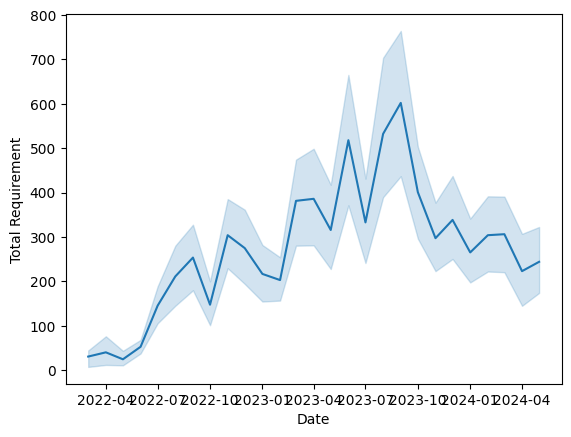

In [173]:
import seaborn as sns
sns.lineplot(x='Date',y='Total Requirement',data=pivot_table)


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

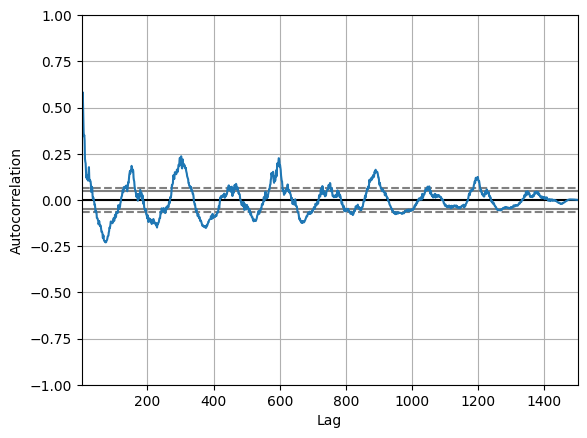

In [174]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(pivot_table['Total Requirement'])

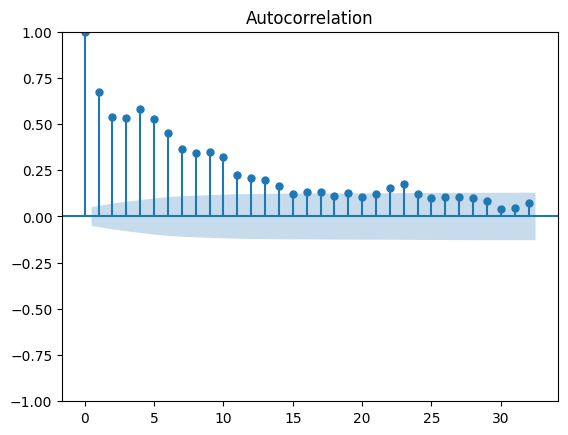

In [175]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(pivot_table['Total Requirement'])
plt.show()

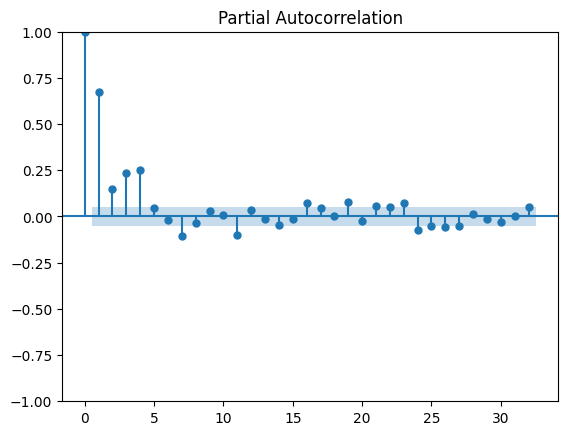

In [176]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(pivot_table['Total Requirement'])
plt.show()

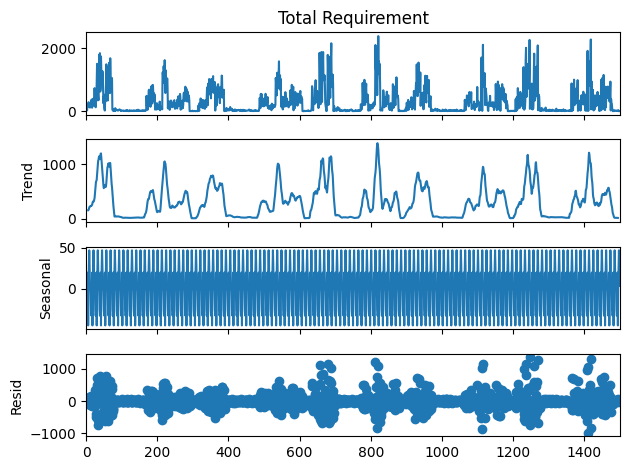

In [177]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition=seasonal_decompose(pivot_table['Total Requirement'],model='additive',period=12)
decomposition.plot()
plt.show()

In [178]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(pivot_table["Total Requirement"], autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)



1. ADF :  -5.189746440309048
2. P-Value :  9.22590757235105e-06
3. Num Of Lags :  24
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1476
5. Critical Values :
	 1% :  -3.4347881497897688
	 5% :  -2.8635001537551923
	 10% :  -2.567813565797108


In [179]:
data_diff=pivot_table['Total Requirement'].diff(periods=10)

In [180]:
dftest = adfuller(data_diff.dropna(), autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -8.55634203504791
2. P-Value :  8.938122095947607e-14
3. Num Of Lags :  22
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1468
5. Critical Values :
	 1% :  -3.434812378381713
	 5% :  -2.863510846577674
	 10% :  -2.5678192598690317


In [181]:
import pmdarima as pmd

model=pmd.auto_arima(pivot_table['Total Requirement'],start_p=1,start_q=1,test='adf',m=12,seasonal=True,trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=3.41 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=22252.465, Time=0.04 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=21343.473, Time=0.43 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=21645.428, Time=1.01 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=22933.709, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=21343.090, Time=0.08 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=21343.373, Time=0.44 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=21345.373, Time=0.90 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=21310.208, Time=0.14 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=21312.179, Time=0.61 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=21312.177, Time=0.60 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=21314.177, Time=1.57 sec
 ARIMA(3,0,0)(0,0,0)[12] intercept   : AIC=21226.023, Time=0.27 sec
 ARIMA(3,0,0)(1,0,0)[12] intercept   : AIC=21228.022, Time=1.10 sec
 ARIMA(3,0,

In [182]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima=SARIMAX(pivot_table['Total Requirement'],order=(5,0,0),seasonal_order=(1,0,0,12))
predicted=sarima.fit().predict();predicted

0         0.000000
1        99.599822
2       103.250265
3        69.684701
4        62.036910
           ...    
1496     19.831296
1497      4.589990
1498      9.883390
1499     13.787232
1500      4.255226
Name: predicted_mean, Length: 1501, dtype: float64

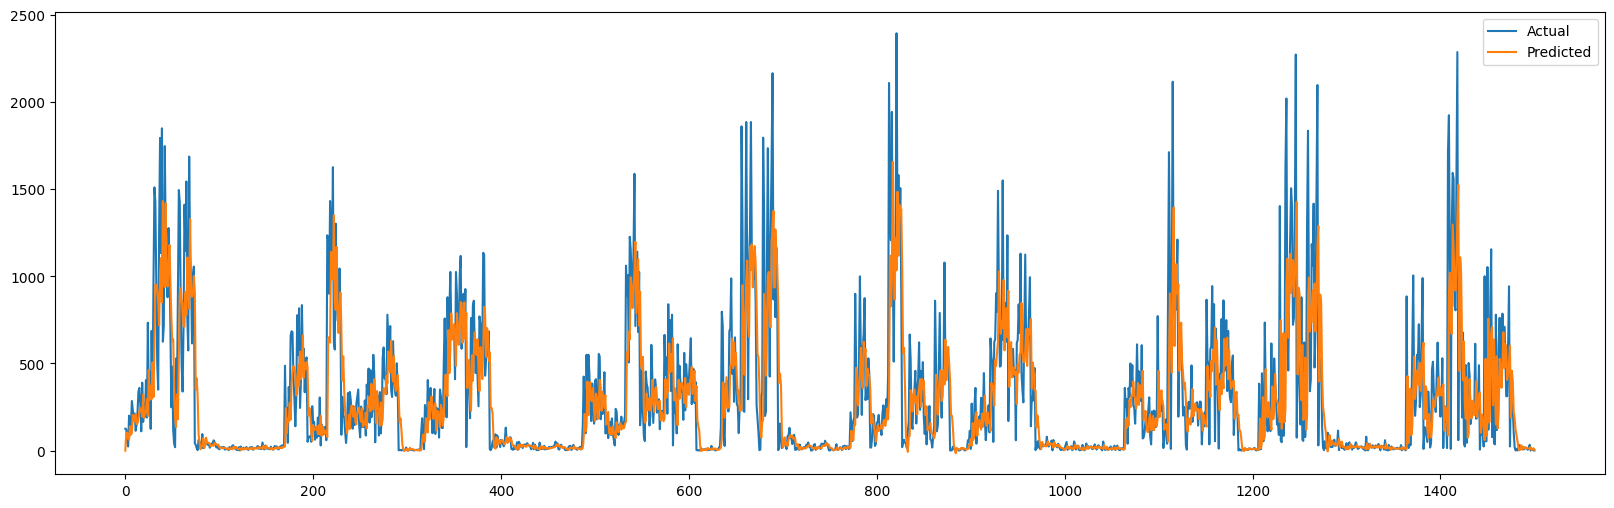

In [183]:
plt.figure(figsize=(20,6))
plt.plot(pivot_table['Total Requirement'],label='Actual')
plt.plot(predicted,label='Predicted')
plt.legend()

In [184]:
resid=pivot_table['Total Requirement']-predicted;resid
mae=abs(resid.mean());mae

24.6270985062404

In [185]:
# Calculate RMSE
import numpy as np
from sklearn.metrics import r2_score

rmse_test = r2_score(pivot_table['Total Requirement'], predicted)
print("Root Mean Squared Error on test data:", rmse_test)

Root Mean Squared Error on test data: 0.524465862626631


In [197]:
l=pd.DataFrame({"Pred":predicted})
l.to_csv("2.csv")

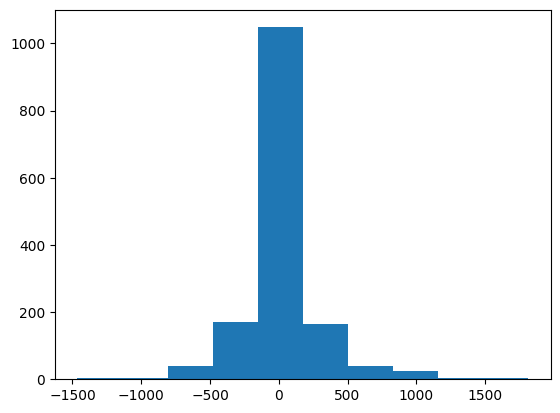

In [186]:
plt.hist(resid)
plt.show()
#residuals follow Normal distribution

In [187]:
(resid**2).mean() #mse

76209.00528981123

In [188]:
sarima1=SARIMAX(pivot_table['Total Requirement'],order=(5,0,0),seasonal_order=(1,0,0,12))
predicted1=sarima1.fit().predict();predicted1

0         0.000000
1        99.599822
2       103.250265
3        69.684701
4        62.036910
           ...    
1496     19.831296
1497      4.589990
1498      9.883390
1499     13.787232
1500      4.255226
Name: predicted_mean, Length: 1501, dtype: float64

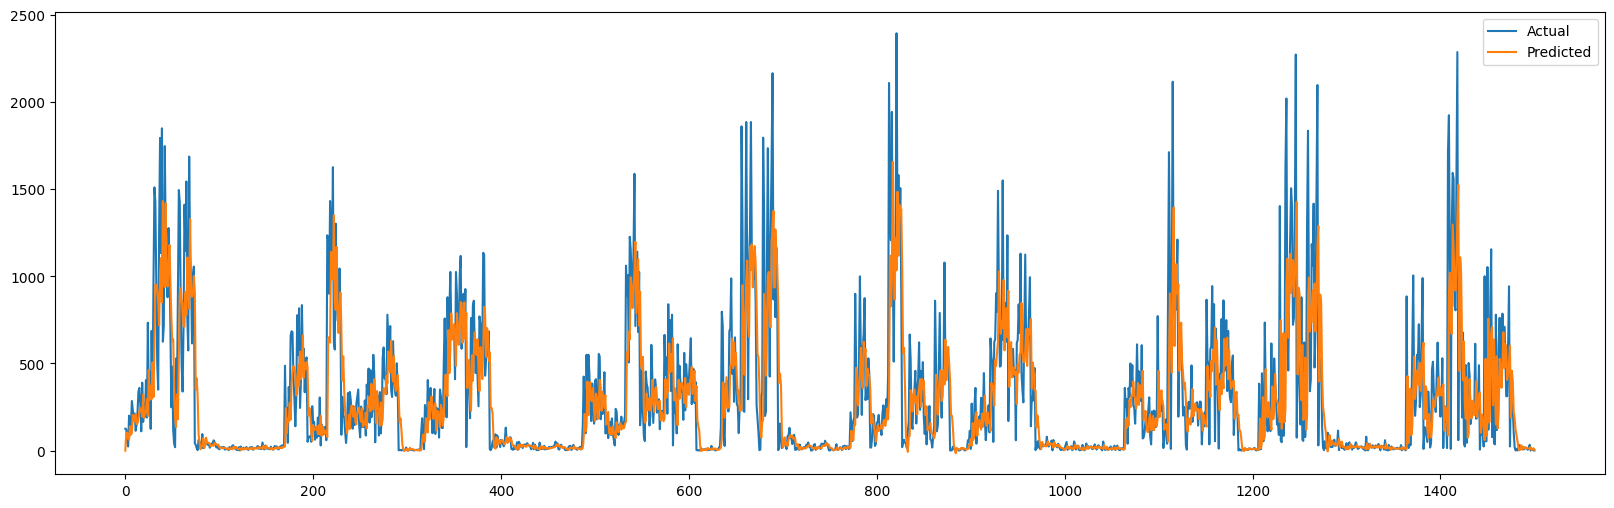

In [189]:
plt.figure(figsize=(20,6))
plt.plot(pivot_table['Total Requirement'],label='Actual')
plt.plot(predicted1,label='Predicted')
plt.legend()

In [190]:
resid1=pivot_table['Total Requirement']-predicted1;resid1
mae1=abs(resid1.mean());mae1

24.6270985062404

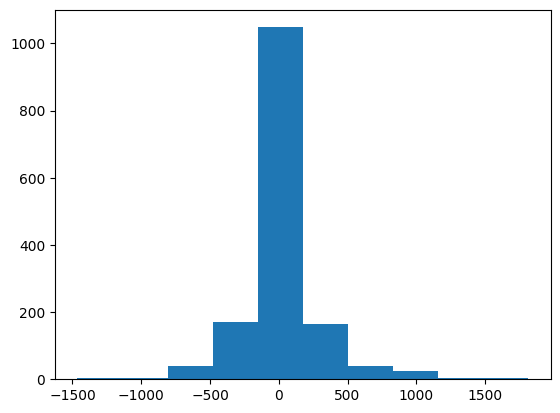

In [191]:
plt.hist(resid1)
plt.show()

In [192]:
import scipy.stats

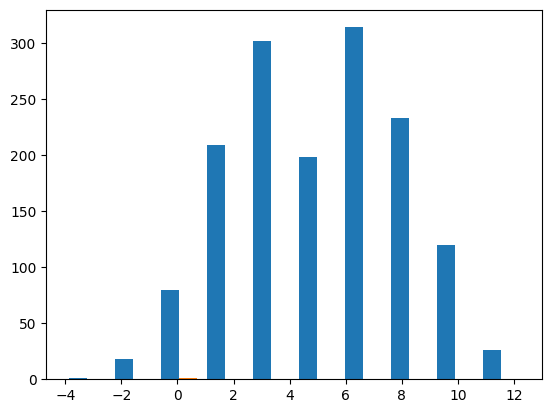

In [193]:
resid11=scipy.stats.boxcox(abs(resid1))
plt.hist(resid11)
plt.show()

In [194]:
(resid1**2).mean() #mse

76209.00528981123

In [195]:
model=pmd.auto_arima(pivot_table['Total Requirement'],start_p=1,start_q=1,test='adf',m=12,seasonal=True,trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=3.24 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=22252.465, Time=0.04 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=21343.473, Time=0.44 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=21645.428, Time=1.18 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=22933.709, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=21343.090, Time=0.20 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=21343.373, Time=0.54 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=21345.373, Time=1.08 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=21310.208, Time=0.17 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=21312.179, Time=0.94 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=21312.177, Time=0.66 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=21314.177, Time=1.69 sec
 ARIMA(3,0,0)(0,0,0)[12] intercept   : AIC=21226.023, Time=0.29 sec
 ARIMA(3,0,0)(1,0,0)[12] intercept   : AIC=21228.022, Time=1.05 sec
 ARIMA(3,0,

In [196]:
def sarima_forecast(clinic_df, medicine_name):
    medicine_data = clinic_df[clinic_df['Medicine Name'] == medicine_name]['Total Requirement']
    
    model = SARIMAX(medicine_data, order=(0, 1, 2), seasonal_order=(1, 0, 0, 12))
    
    results = model.fit(disp=False)
    forecast = results.get_forecast(steps=1)
    forecast_value = forecast.predicted_mean.iloc[0]
 
    return forecast_value

# List of medicines
medicines = clinic_a_df['Medicine Name'].unique()

# Dictionary to store forecasts for each clinic
clinic_forecasts = {}

# Forecast for each medicine in each clinic
for clinic_name, clinic_df in clinic_dfs.items():
    forecasts = {}
    for med in medicines:
        forecast_june = sarima_forecast(clinic_df, med)
        forecasts[med] = forecast_june
    clinic_forecasts[clinic_name] = forecasts

# Display the forecasted values for June for each clinic and medicine
for clinic, forecasts in clinic_forecasts.items():
    print(f"\nForecasts for {clinic}:")
    for med, forecast in forecasts.items():
        print(f'  Forecast for {med} in June: {forecast:.2f}')



c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ign


Forecasts for ECMT027 Jaunpur MML:
  Forecast for Amoxycillin 250 mg Caps in June: 283.31
  Forecast for Calcium + Vit D3 250iu Tabs in June: 896.99
  Forecast for Cap Becosule in June: 981.70
  Forecast for Cetrizine 10mg  Tabs in June: 45.29
  Forecast for Cetrizine 10mg film coated Tablets in June: 11.63
  Forecast for Cough Syrup in June: 8.14
  Forecast for Diclofenac Gel in June: 19.92
  Forecast for Iron Tablet in June: 501.03
  Forecast for Metronidazole 400 mg Tab in June: 130.67
  Forecast for Omeprazole 20mg Capsules in June: 1073.72
  Forecast for Paracetamol 500mg Tab in June: 198.45
  Forecast for Ranitidine HCl. 150 mg  Tabs in June: 440.02
  Forecast for Tab Aceclo 100mg+ PCM 325mg (SOS) in June: 240.69
  Forecast for tab Fluconazole 150mg in June: 4.47

Forecasts for ECMT044 PILAKHUA TEHSIL MML HAPUR:
  Forecast for Amoxycillin 250 mg Caps in June: 238.68
  Forecast for Calcium + Vit D3 250iu Tabs in June: 790.10
  Forecast for Cap Becosule in June: 644.61
  Forecast 

c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction resul

In [ ]:
# Convert forecast data to DataFrame
forecast_df = pd.DataFrame.from_dict(clinic_forecasts)
forecast_df.index.name = 'Medicine Name'

# Save DataFrame to CSV
forecast_df.to_csv('clinic_forecasts.csv')

# Display the forecasted values for June for each clinic and medicine
print("Forecasted values for June saved to clinic_forecasts.csv.")

Forecasted values for June saved to clinic_forecasts.csv.


In [ ]:
# import matplotlib.pyplot as plt

# def sarima_forecast(clinic_df, medicine_name):
#     medicine_data = clinic_df[clinic_df['Medicine Name'] == medicine_name]['Total Requirement']
    
#     model = SARIMAX(medicine_data, order=(0, 1, 2), seasonal_order=(1, 0, 0, 12))
    
#     results = model.fit(disp=False)
#     predicted_values = results.get_prediction(start=0, end=len(medicine_data)-1)
#     forecast_value = predicted_values.predicted_mean.iloc[-1]
 
#     return forecast_value, predicted_values

# # List of medicines
# medicines = clinic_a_df['Medicine Name'].unique()

# # Dictionary to store forecasts for each clinic
# clinic_forecasts = {}

# # Forecast for each medicine in each clinic
# for clinic_name, clinic_df in clinic_dfs.items():
#     forecasts = {}
#     for med in medicines:
#         forecast_june, predicted_values = sarima_forecast(clinic_df, med)
#         forecasts[med] = forecast_june
        
#         # Plot actual vs predicted values
#         plt.figure(figsize=(10, 6))
#         plt.plot(clinic_df[clinic_df['Medicine Name'] == med]['Date'], clinic_df[clinic_df['Medicine Name'] == med]['Total Requirement'], label='Actual')
#         plt.plot(clinic_df[clinic_df['Medicine Name'] == med]['Date'], predicted_values.predicted_mean, label='Predicted')
#         plt.title(f'Actual vs Predicted for {med} in {clinic_name}')
#         plt.xlabel('Date')
#         plt.ylabel('Total Requirement')
#         plt.legend()
#         plt.show()
       
        
#     clinic_forecasts[clinic_name] = forecasts

# # Display the forecasted values for June for each clinic and medicine
# for clinic, forecasts in clinic_forecasts.items():
#     print(f"\nForecasts for {clinic}:")
#     for med, forecast in forecasts.items():
#         print(f'  Forecast for {med} in June: {forecast:.2f}')
